Loading the dataset 

In [6]:
dataset_dir = "E:\Real-vs-Fake-Image-Classification-main\Dataset"

Preprocessing the dataset

In [7]:
import tensorflow as tf

img_height = 32 
img_width = 32
batch_size = 32

#Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = val_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


In [8]:
train_dir = dataset_dir + "/train"
test_dir = dataset_dir + "/test"

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# VGG16

In [22]:
# Set up the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
batch_size=32

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(32,32),batch_size=batch_size, class_mode='binary')

Found 100000 images belonging to 2 classes.


In [24]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=50)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 49ms/step - accuracy: 0.7793 - loss: 0.4629
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.8269 - loss: 0.3871
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 157s 50ms/step - accuracy: 0.8373 - loss: 0.3687
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 151s 48ms/step - accuracy: 0.8408 - loss: 0.3582
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.8455 - loss: 0.3504
Epoch 10/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.8490 - loss: 0.3410
Epoch 12/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 148s 47ms/step - accuracy: 0.8

In [25]:
# Save the model
model.save('vgg16_model.h5')

In [26]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

# Make predictions on the test data
predictions = model.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

Found 20000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step

Accuracy: 0.8818

Confusion Matrix:
[[9251  749]
 [1615 8385]]


Confusion Matrix for VGG16

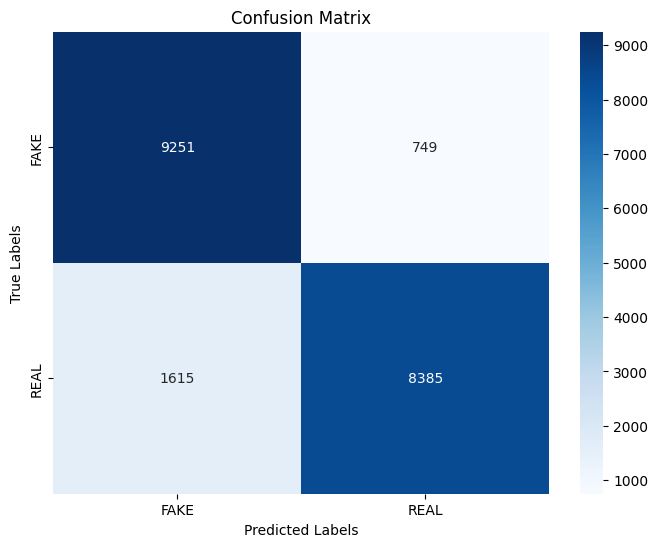

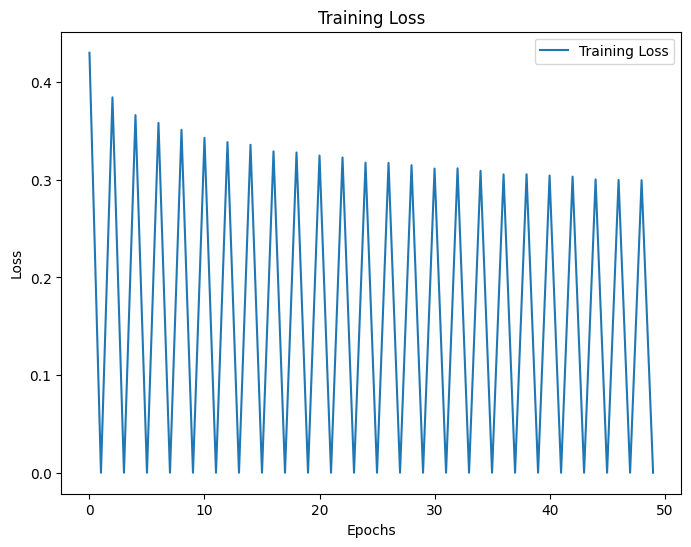

In [27]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# ResNet50 

In [28]:
# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [29]:
#Building the model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)
model_resnet = Model(inputs = resnet_50.input, outputs = predictions)

In [31]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [32]:
# launch the training
model_history = trainModel(model = model_resnet, epochs = 15, optimizer = "Adam")

Epoch 1/15
  13/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.4804 - loss: 2.8560

W0000 00:00:1721253804.070520     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3122/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7447 - loss: 0.6104

W0000 00:00:1721253834.684641     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.7448 - loss: 0.6102 - val_accuracy: 0.8694 - val_loss: 0.3289
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8631 - loss: 0.3370 - val_accuracy: 0.8847 - val_loss: 0.2775
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8742 - loss: 0.3165 - val_accuracy: 0.8906 - val_loss: 0.2697
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8834 - loss: 0.2954 - val_accuracy: 0.8946 - val_loss: 0.2511
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8899 - loss: 0.2846 - val_accuracy: 0.8939 - val_loss: 0.2499
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8935 - loss: 0.2748 - val_accuracy: 0.8977 - val_loss: 0.2516
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8962 - loss: 0.2697 - val_accuracy: 0.9018 - val_loss: 0.2439
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9006 - loss: 0.26

In [33]:
# Save the model
model_resnet.save('resnet_model.h5')

Calculating the training and validation accuracy for ResNet50 

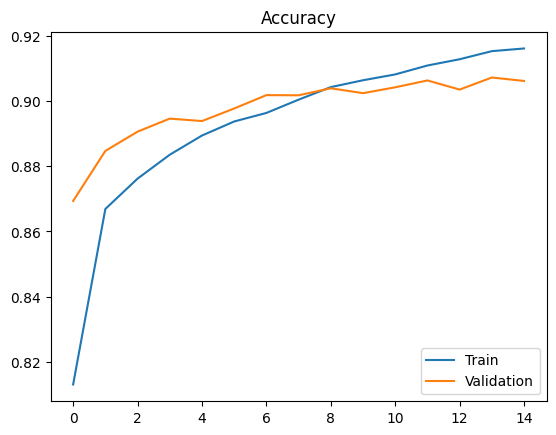

In [34]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [35]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)
test_loss, test_acc = model_resnet.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

Found 20000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  6/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9082 - loss: 0.1942

W0000 00:00:1721254292.303630     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9148 - loss: 0.2265
The test loss is:  0.2344779521226883
The best accuracy is:  90.56000113487244


In [36]:
predictions = model_resnet.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

  6/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step

W0000 00:00:1721254319.087331     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step


Confusion Matrix for ResNet50 

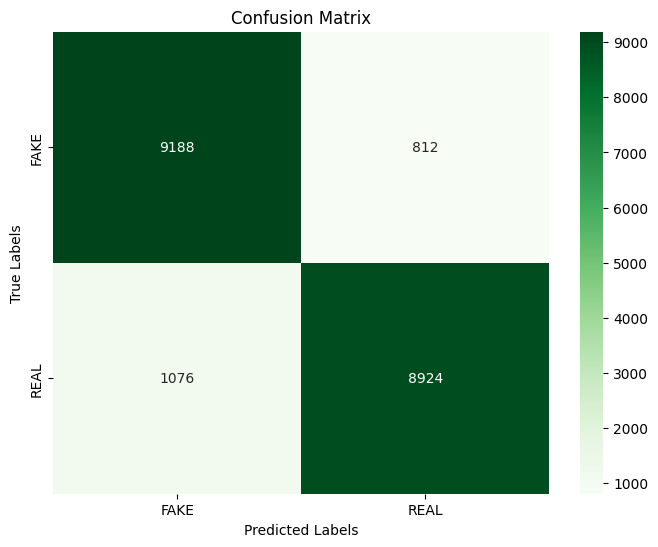

In [37]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# MobileNetV3

In [3]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, concatenate, Activation
import visualkeras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

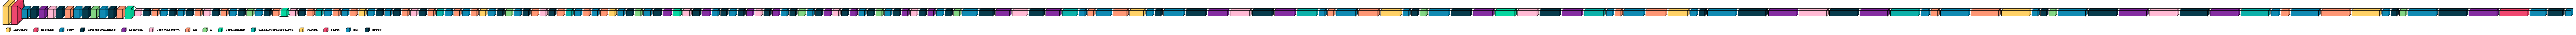

In [13]:
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45)(x)
output = Dense(1, activation='sigmoid')(x)

mobilenet_model = Model(base_model.input, output)

visualkeras.layered_view(mobilenet_model, scale_xy=2, legend=True)

In [14]:
mobilenet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

history = mobilenet_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/3125 ━━━━━━━━━━━━━━━━━━━━ 52:17:52 60s/step - accuracy: 0.5312 - loss: 1.0497

I0000 00:00:1721245332.244956     149 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 613s 177ms/step - accuracy: 0.7533 - loss: 0.5264 - val_accuracy: 0.4997 - val_loss: 11.3357 - learning_rate: 0.0010
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 176s 56ms/step - accuracy: 0.8501 - loss: 0.3526 - val_accuracy: 0.5000 - val_loss: 290.2787 - learning_rate: 0.0010
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 175s 56ms/step - accuracy: 0.8725 - loss: 0.3066 - val_accuracy: 0.6428 - val_loss: 1.0413 - learning_rate: 0.0010
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 178s 57ms/step - accuracy: 0.8943 - loss: 0.2610 - val_accuracy: 0.5000 - val_loss: 23.8786 - learning_rate: 0.0010
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 200s 56ms/step - accuracy: 0.8937 - loss: 0.2594 - val_accuracy: 0.5000 - val_loss: 44.3347 - learning_rate: 0.0010
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 175s 56ms/step - accuracy: 0.9097 - loss: 0.2246 - val_accuracy: 0.5000 - val_loss: 33.6932 - learning_rate: 0.0010
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 176s 56ms/step - acc

In [15]:
mobilenet_model.save('mobilenet_model.h5')

Calculating the training and validation accuracy

In [18]:
y_true = test_generator.classes
y_pred = mobilenet_model.predict(test_generator)
y_pred_classes = [0 if y < 0.5 else 1 for y in y_pred]
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy*100:.2f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step
Accuracy: 95.34


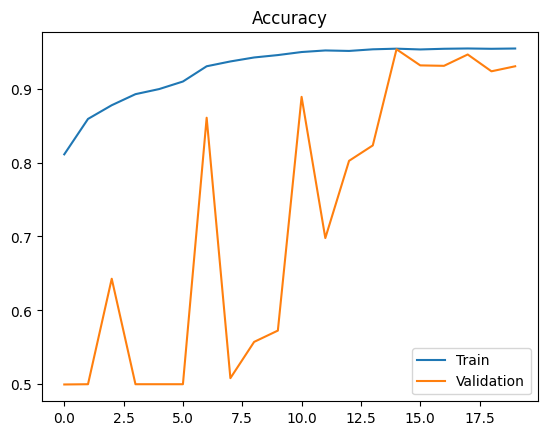

In [19]:
acc_train_curve = history.history["accuracy"]
acc_val_curve = history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

Confusion Matrix for MobileNetV3

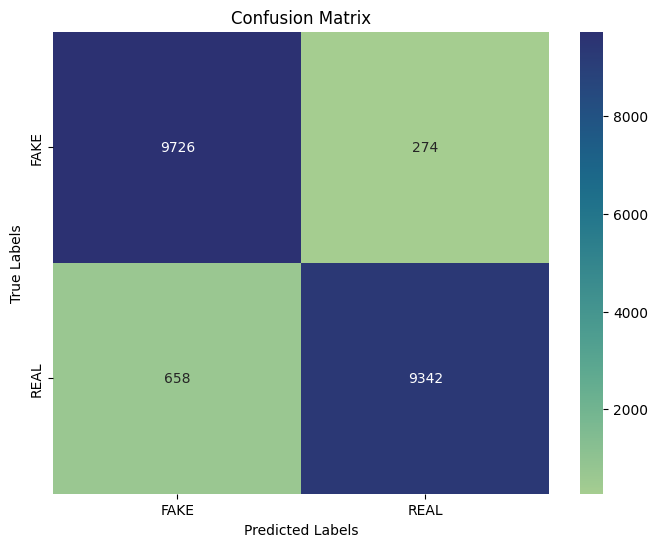

In [20]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='crest', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Comparing accuracies of the models used

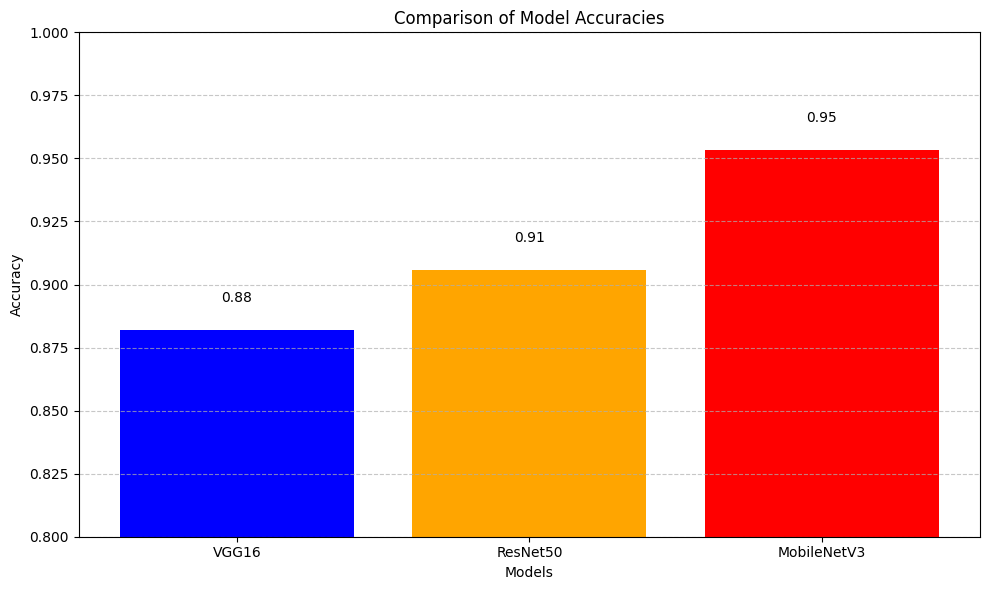

In [38]:
import matplotlib.pyplot as plt

models = ['VGG16', 'ResNet50', 'MobileNetV3']
accuracies = [0.8818, 0.9056, 0.9534] 
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'red'])  
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Import Necessary Libraries to test the models

In [39]:
import os
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

Helper Functions to Load and Preprocess Images

In [48]:
def load_and_preprocess_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array

Load and Preprocess New Images

In [49]:
# Directory paths for real and fake images
real_images_dir = 'Images/Real'
fake_images_dir = 'Images/Fake'

# Load and preprocess all images
real_images = [load_and_preprocess_image(os.path.join(real_images_dir, img)) for img in os.listdir(real_images_dir)]
fake_images = [load_and_preprocess_image(os.path.join(fake_images_dir, img)) for img in os.listdir(fake_images_dir)]

all_images = real_images + fake_images
all_labels = [1] * len(real_images) + [0] * len(fake_images)

# Combine all images into one array
all_images_array = np.vstack(all_images)

Making Predictions

In [50]:
predictions_vgg16 = model.predict(all_images_array)
predictions_resnet = model_resnet.predict(all_images_array)
predictions_mobilenet = mobilenet_model.predict(all_images_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


W0000 00:00:1721254671.719990     147 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Visualizing Predictions

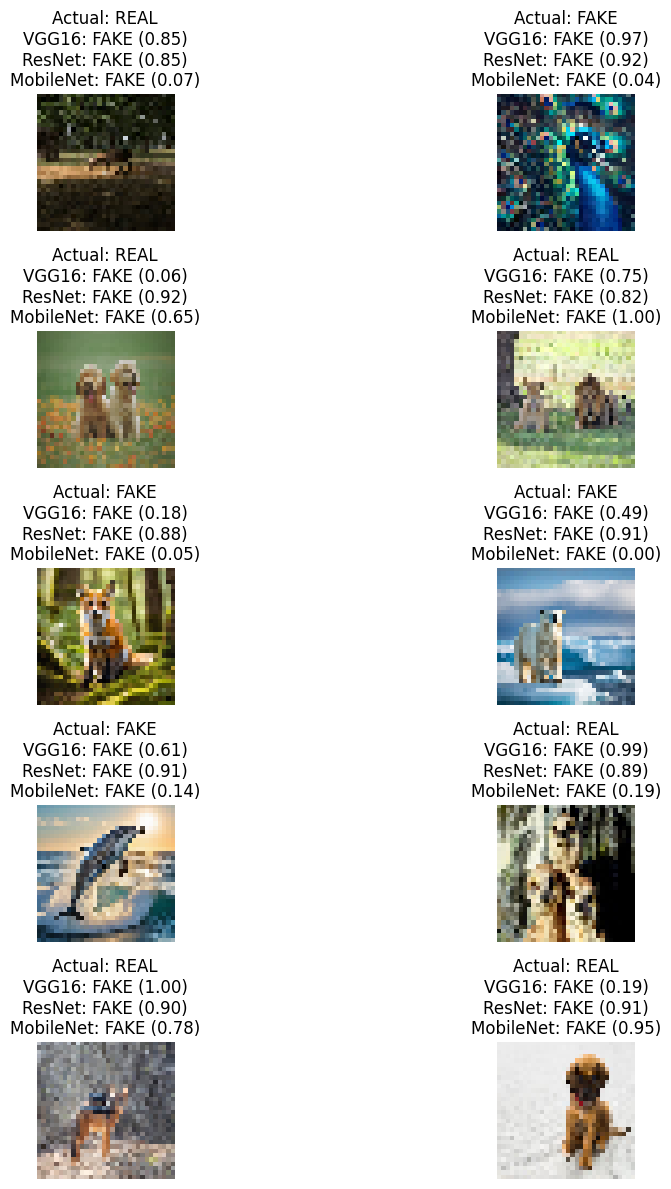

In [51]:
sample_indices = np.random.choice(len(all_images_array), size=10, replace=False)
sample_images = []
sample_actual_labels = []
sample_predicted_labels_vgg16 = []
sample_predicted_labels_resnet = []
sample_predicted_labels_mobilenet = []
sample_probabilities_vgg16 = []
sample_probabilities_resnet = []
sample_probabilities_mobilenet = []

for i in sample_indices:
    image = all_images_array[i]
    actual_label = all_labels[i]
    predicted_label_vgg16 = np.argmax(predictions_vgg16[i])
    predicted_label_resnet = np.argmax(predictions_resnet[i])
    predicted_label_mobilenet = np.argmax(predictions_mobilenet[i])
    probability_vgg16 = np.max(predictions_vgg16[i])
    probability_resnet = np.max(predictions_resnet[i])
    probability_mobilenet = np.max(predictions_mobilenet[i])
    sample_images.append(image)
    sample_actual_labels.append(actual_label)
    sample_predicted_labels_vgg16.append(predicted_label_vgg16)
    sample_predicted_labels_resnet.append(predicted_label_resnet)
    sample_predicted_labels_mobilenet.append(predicted_label_mobilenet)
    sample_probabilities_vgg16.append(probability_vgg16)
    sample_probabilities_resnet.append(probability_resnet)
    sample_probabilities_mobilenet.append(probability_mobilenet)

num_images = len(sample_images)
num_rows = int(np.ceil(num_images / 2))
num_cols = min(num_images, 2)

plt.figure(figsize=(12, 12))
for i in range(len(sample_images)):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(sample_images[i])
    actual_label = "FAKE" if sample_actual_labels[i] == 0 else "REAL"
    predicted_label_vgg16 = "FAKE" if sample_predicted_labels_vgg16[i] == 0 else "REAL"
    predicted_label_resnet = "FAKE" if sample_predicted_labels_resnet[i] == 0 else "REAL"
    predicted_label_mobilenet = "FAKE" if sample_predicted_labels_mobilenet[i] == 0 else "REAL"
    plt.title(f"Actual: {actual_label}\n"
              f"VGG16: {predicted_label_vgg16} ({sample_probabilities_vgg16[i]:.2f})\n"
              f"ResNet: {predicted_label_resnet} ({sample_probabilities_resnet[i]:.2f})\n"
              f"MobileNet: {predicted_label_mobilenet} ({sample_probabilities_mobilenet[i]:.2f})")
    plt.axis('off')
plt.tight_layout()
plt.show()